# Regressão Logística


# 1. Importação das Bibliotecas Necessárias

Primeiro, importamos as bibliotecas necessárias para manipulação dos dados, treinamento do modelo e visualização das métricas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Configurações para visualização
sns.set(style="whitegrid")


# 2. Criação do Conjunto de Dados Sintéticos
Vamos criar um conjunto de dados sintético para a tarefa de classificação binária. Utilizaremos o make_classification para gerar um conjunto de dados com duas classes.

In [2]:
# Criar conjunto de dados sintético
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Criar DataFrame para visualização
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
df['Target'] = y

# Exibir as primeiras linhas do DataFrame
df.head()


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Target
0,-4.906442,3.442789,0.558964,-0.976764,-1.568805,-4.271982,-3.727921,0.111868,2.119795,-2.522812,...,-7.492478,4.264669,0.304866,0.777693,-9.375464,1.654446,3.012859,-4.497003,-2.520066,0
1,2.162610,-5.286651,2.609846,-1.803898,-1.831216,1.450757,2.648709,2.152307,0.524552,0.493548,...,6.680603,-2.431830,2.462773,-1.254824,2.978402,-3.428457,-4.562178,3.698665,-1.923286,1
2,-4.784844,-3.744827,4.657592,-1.408806,-5.444758,-2.416013,3.556495,-1.572119,-0.730549,3.447661,...,7.961059,-5.151105,0.473131,-4.070667,-0.932309,-3.230768,-7.844646,2.803798,-2.963189,1
3,10.465024,1.070944,-3.562432,-0.849062,2.183860,-0.609893,0.946327,-1.046141,-2.057053,-2.056650,...,-1.449095,-1.217685,2.026805,2.121829,3.184256,-1.960146,0.782147,-1.444202,0.915985,0
4,5.599516,-1.776412,-1.304322,-0.720074,5.859373,-3.292432,3.152205,7.099882,-3.321076,3.245486,...,6.608729,5.632297,-1.943748,1.169455,3.782513,-4.752822,-7.577624,4.868025,1.708210,0


# 3. Divisão do Conjunto de Dados
Vamos dividir o conjunto de dados em conjuntos de treino e teste.

In [3]:
# Dividir o conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Verificar as dimensões dos conjuntos
X_train.shape, X_test.shape


((900, 20), (100, 20))

# 4. Treinamento do Modelo de Regressão Logística
Agora, treinamos o modelo de regressão logística com o conjunto de dados de treino.

In [4]:
# Inicializar e treinar o modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# 5. Avaliação do Modelo
Realizamos previsões no conjunto de teste e avaliamos o desempenho do modelo.

In [5]:
# Fazer previsões
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# Relatório de classificação
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.92      0.84        49
           1       0.90      0.75      0.82        51

    accuracy                           0.83       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.83      0.83       100



# 6. Aplicação das Métricas de Avaliação
Vamos calcular e visualizar a matriz de confusão e a curva ROC para avaliar a performance do modelo.

Matriz de Confusão

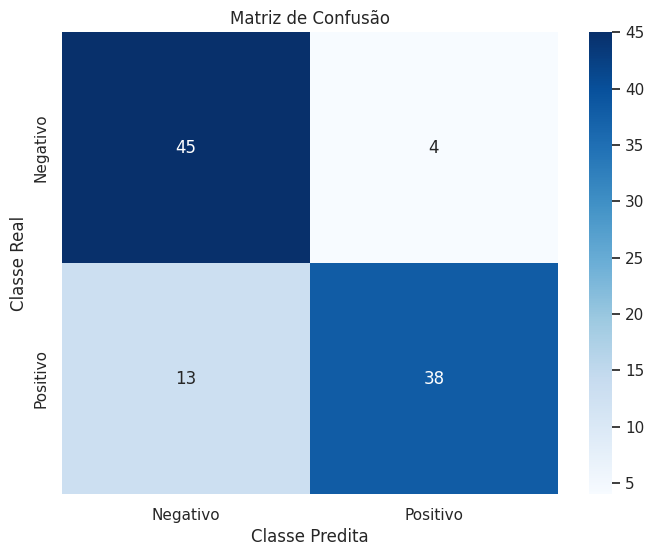

In [6]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.show()


Curva ROC

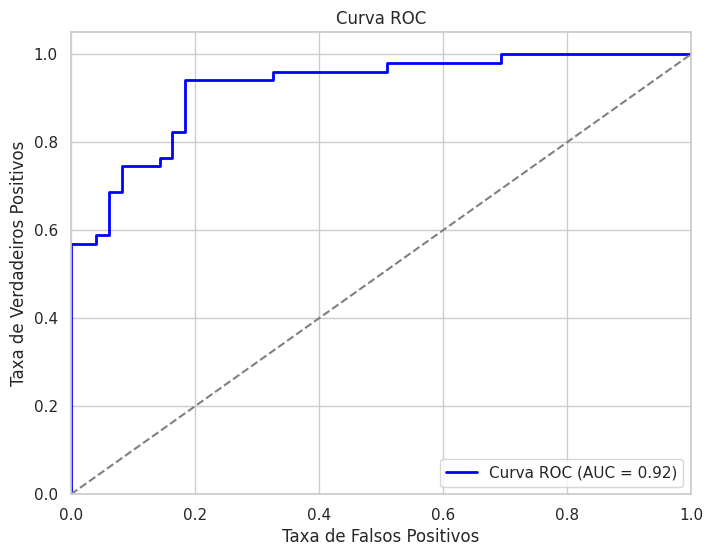

In [7]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


# 7. Comentários dos Resultados
Relatório de Classificação: Fornece informações detalhadas sobre a precisão, recall e f1-score do modelo para cada classe. Isso ajuda a entender como o modelo se sai em termos de verdadeiro positivo, falso positivo, verdadeiro negativo e falso negativo.

Matriz de Confusão: Mostra o desempenho do modelo em termos de contagem de acertos e erros para cada classe. É útil para identificar como o modelo está confundindo as classes.

Curva ROC: Ilustra a capacidade do modelo em distinguir entre as classes. A AUC (Área sob a Curva) fornece uma medida quantitativa do desempenho global do modelo. Quanto mais próximo de 1, melhor o modelo.

# 8. Comentários adicionais
Com o aumento dos dados há uma tendência de melhoria da quantidade de acertos do modelo, porém neste caso ocorreu o contrário, devido ao não uso da validação cruzada.

## 9. Conclusão
Neste notebook, construímos um modelo de regressão logística utilizando um conjunto de dados sintético. Avaliamos o modelo usando a matriz de confusão e a curva ROC. As métricas mostram o desempenho do modelo e ajudam a identificar como ele se comporta em diferentes aspectos da classificação binária.